<a href="https://colab.research.google.com/github/katerinbarrera21/Simulacion/blob/main/PruebaCorrecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import simpy
import random
import matplotlib.pyplot as plt

In [62]:
import simpy
import random
from scipy.stats import uniform
from random import expovariate
from scipy import stats
from numpy import random as nprandom
import math 
import numpy as np 
import matplotlib.pyplot as plt

NUM_CARRILES =3
carril_liviano1 = {}
carril_liviano2 = {}
carril_pesado = {}
autos_aprovados= {}
autos_rechazados= {}
tiempoTotalAutos_porDis= {}
tiempo_total_dia={}
tipo_liviano_carril= [2,1]
num_livianos_total=2
num_pesados_total=1
RANGO_llegada = 3
#Llega el vehiculo al centro, se estaciona (3-5 minutos), saca un turno (1-3 minutos) y pagan la matricula (5 - 10 minutos).
tiempo={}
TIEMPO_SIMULACION=43200 #30 dias
# Creamos una clase que permita modelar mi escenario



class CARRIL_ASIGNADO(object):
  def __init__(self, environment, num_livianos, num_pesados):
    # Guardamos como variable el entorno de ejecucion
    self.env=environment
    # Creamos el recurso que representa los cajeros
    self.carril_liviano = simpy.Resource(environment, num_livianos)
    self.carril_pesado = simpy.Resource(environment, num_pesados)

  #  while cont ==0:
   #   print(f'El auto {cliente} entra a revision a las {env.now}')
    #  yield self.env.timeout(random.normalvariate(20, 10))
     # print(f'El auto {cliente} sale de revision  a las {env.now}')
     # yield self.env.timeout(random.randint(1,3))
     # print(f'El auto {cliente} ya tiene su sello  a las {env.now}')
     # yield self.env.timeout(random.randint(5,10))
     # print(f'El auto {cliente} sale y finaliza  su proceso  a las {env.now}')

def regresar(env,nombre,tipo, carrilAsignado):
    env.process(usar_carril(env,nombre, tipo,carrilAsignado))


def realizarRevision(idMaquinaActual, iteradorDias):
    if idMaquinaActual == 0:  
            if iteradorDias in carril_pesado:
                carril_pesado[iteradorDias]=carril_pesado[iteradorDias]+1 
            else:
                carril_pesado[iteradorDias]=1

        #maquina liviana 1
    elif idMaquinaActual == 1 :
            if iteradorDias in carril_liviano1:
                carril_liviano1[iteradorDias]=carril_liviano1[iteradorDias]+1
            else:
                carril_liviano1[iteradorDias]=1
        #maquina Liviana 2 
    elif idMaquinaActual == 2: 
            if iteradorDias in carril_liviano2:
                carril_liviano2[iteradorDias]=carril_liviano2[iteradorDias]+1 
            else:
                carril_liviano2[iteradorDias]=1


def usar_carril(env, cliente, tipo, carrilAsignado):
    

    print(f'El caril entra en uso por el auto {cliente} a las {env.now}')
    tiempo_procesos= random.randint(3,5)
    yield env.timeout(tiempo_procesos)
    tiempo_total_dia= +tiempo_procesos
    print(f'El auto {cliente} se estaciona a las {env.now}, [{tiempo_procesos}]')

    tiempo_procesos= random.randint(1,3)
    yield env.timeout(tiempo_procesos)
    tiempo_total_dia= +tiempo_procesos   
    print(f'El  auto {cliente}  saca su turno a las {env.now}, [{tiempo_procesos}]')

    tiempo_procesos = random.randint(5,10)
    yield env.timeout(tiempo_procesos)
    tiempo_total_dia= +tiempo_procesos       
    print(f'El  auto {cliente}  paga la matricula {env.now},  [{tiempo_procesos}] ')

    idMaquinaActual= 0

    if tipo == 'normal' : 

        with carrilAsignado.carril_liviano.request() as carril_liviano:
            
            yield carril_liviano
            idMaquinaActual=tipo_liviano_carril.pop()
            print(f'AUTO {cliente}, tiempo {env.now}, tipo {tipo}')
            mu, sigma = 20, 10 
            tiempo = abs(math.ceil(np.random.normal(mu, sigma, 1))) 
            yield env.timeout(tiempo)
            print(f'El AUTo {cliente} en el tiempo {tiempo}')
            tiempo_total_dia =+ tiempo
            tipo_liviano_carril.append(idMaquinaActual)
                    
    elif tipo == 'pesado': 
        
        with carrilAsignado.carril_pesado.request() as carril_pesado:
            
            yield carril_pesado
            
            print(f'AUTO {cliente}, tiempo {env.now}, tipo {tipo}')
            mu, sigma = 20, 10 
            tiempo = abs(math.ceil(np.random.normal(mu, sigma, 1))) 
            yield env.timeout(tiempo)
            print(f'El AUTo {cliente} en el tiempo {tiempo}')
            tiempo_total_dia =+ tiempo
            

    probabilidadRechazo=pasarRevision()
  
    if (probabilidadRechazo == 0):
      print('El AUTO pasa a revision')
      tiempo_procesos=random.randint(1,3)
      yield env.timeout(tiempo_procesos)
      print(f'El AUTO {cliente} tiene sello [{tiempo_procesos}]')
      tiempo_total_dia =+ tiempo_procesos
      
      tiempo_procesos=random.randint(1,3)
      yield env.timeout(tiempo_procesos)
      print(f'El AUTO {cliente} salio { math.ceil(env.now/1440)} [{tiempo_procesos}]')
      tiempo_total_dia =+ tiempo_procesos

      iteradorDias=math.ceil(env.now/1440)
      realizarRevision(idMaquinaActual, iteradorDias)
      #agregar aprovados 
      if iteradorDias in autos_aprovados:
            autos_aprovados[iteradorDias]=autos_aprovados[iteradorDias]+1 
      else:
            autos_aprovados[iteradorDias]=1

      #
      if iteradorDias in tiempoTotalAutos_porDis:
            tiempoTotalAutos_porDis[iteradorDias]=tiempoTotalAutos_porDis[iteradorDias]+tiempo_total_dia
            tiempo_total_dia=0 
      else:
            tiempoTotalAutos_porDis[iteradorDias]=tiempo_total_dia
            tiempo_total_dia=0


     
     
    elif(probabilidadRechazo ==1):
      print(f'El AUTO pasa no revision')
      iteradorDias=math.ceil(env.now/1440)
      realizarRevision(idMaquinaActual, iteradorDias)
      if iteradorDias in autos_rechazados:
            autos_rechazados[iteradorDias]=autos_rechazados[iteradorDias]+1 
      else:
            autos_rechazados[iteradorDias]=1


      if iteradorDias in tiempoTotalAutos_porDis:
            tiempoTotalAutos_porDis[iteradorDias]=tiempoTotalAutos_porDis[iteradorDias]+tiempo_total_dia
            tiempo_total_dia=0 
      else:
            tiempoTotalAutos_porDis[iteradorDias]=tiempo_total_dia
            tiempo_total_dia=0



      yield env.timeout(2880)
      print(f'El AUTO {cliente} regreso en Dia: {math.ceil(env.now/1440)}')
      regresar(env,cliente, tipo,carrilAsignado)
       








def tipoVehiculo():
  return nprandom.binomial(n=1, p=0.15, size=1)

def pasarRevision():
  return nprandom.binomial(n=1, p=0.6, size=1)

# Generamos el proceso de cola
def llegada_cliente(env,tipo, nombre, carrilAsignado):
  print(f'El auto {nombre} llega a las {env.now}')
  yield env.process( usar_carril(env, nombre, tipo, carrilAsignado))
    #res = simpy.Resource(env, capacity=1)
    #usuario = env.process(recurso_usuario(env, res)) #
    
    #proceso = env.process(recurso_usuario(env, res, nombre)) # Dos invocaciones del uso del recurso

  #  k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
  #if k in tiempo:
   #   tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
  #else:
 #     tiempo[k]=1 # Por defecto empezamos con el primer vehiculo




def ejecutar_simulacion(env, num_livianos_total, num_pesados_total):
  carrilAsignado=CARRIL_ASIGNADO(env, num_livianos_total, num_pesados_total)
  # Creamos 5 llegadas de clientes iniciales
  #for i in range(5):
   # env.process(llegada_cliente(env,tipo ,'AUTO-%d'%(i+1),carrilAsignado))
  
  i= 0
  # Ejecutamos la simulacion
  while True:
    # Generamos un procesos de llegada uniforme
   
    yield env.timeout(3)
    i+=1
    # Atiendo a los clientes
    tipo= tipoVehiculo()
    if tipo ==0 :
      tipoVehi= 'normal'
    elif tipo==1:
      tipoVehi= 'pesado'
    env.process(llegada_cliente(env, tipoVehi, 'AUTO-%d'%(i),carrilAsignado))

     # Terminamos despues de 1000 clientes
   

      
print('Cajeros automaticos')
# Inicializamos la semilla aleatoria
random.seed(77)
# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, num_livianos_total, num_pesados_total))

# Ejecutamos el proceso
env.run(until = TIEMPO_SIMULACION)

# Ejecutamos el proceso durante el tiempo de simulacion
print(carril_liviano1)
print(carril_liviano2)
print(carril_pesado)
print(autos_aprovados)
print(autos_rechazados)
print(tiempoTotalAutos_porDis)





Se han truncado las últimas 5000 líneas del flujo de salida.
El auto AUTO-13775 se estaciona a las 41328, [3]
El AUTo AUTO-5086 en el tiempo 8
El AUTO pasa a revision
El auto AUTO-8187 se estaciona a las 41329, [4]
El  auto AUTO-13775  saca su turno a las 41329, [1]
AUTO AUTO-5088, tiempo 41329, tipo pesado
El AUTo AUTO-4046 en el tiempo 47
El AUTO pasa a revision
El  auto AUTO-13772  paga la matricula 41331,  [9] 
El auto AUTO-13777 llega a las 41331
El caril entra en uso por el auto AUTO-13777 a las 41331
El auto AUTO-13776 se estaciona a las 41331, [3]
El AUTO AUTO-5086 tiene sello [2]
El  auto AUTO-8187  saca su turno a las 41331, [2]
AUTO AUTO-4049, tiempo 41331, tipo normal
El  auto AUTO-13773  paga la matricula 41332,  [9] 
El AUTO AUTO-4046 tiene sello [2]
El  auto AUTO-13776  saca su turno a las 41333, [2]
El AUTO AUTO-5086 salio 29 [2]
El AUTo AUTO-5088 en el tiempo 5
El AUTO pasa a revision
El auto AUTO-13778 llega a las 41334
El caril entra en uso por el auto AUTO-13778 a l

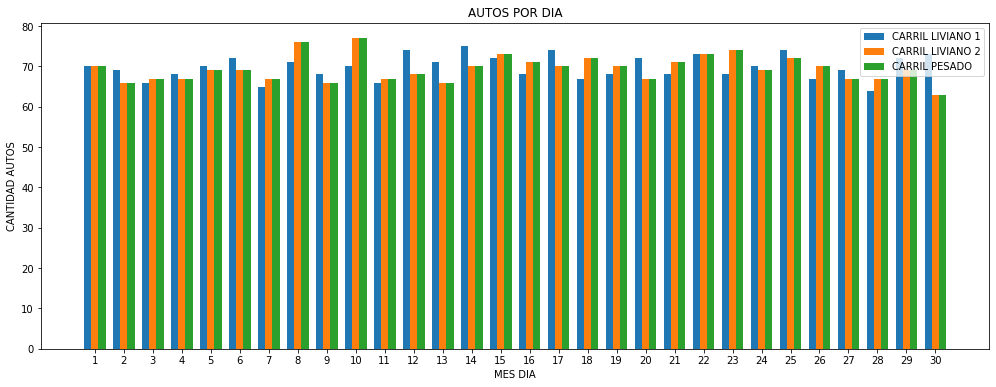

In [57]:
#///////////////////////////////////////////////////graficas //////////////////////////////////////


etiqueta = list(carril_liviano1.keys())
carrilL1 = list(carril_liviano1.values())
carrilL2 = list(carril_liviano2.values())
carrilPes = list(carril_liviano2.values())



numero_de_grupos = len(carril_liviano1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.25
 
plt.figure(figsize=(17,6), )
plt.bar(indice_barras, carrilL1, width=ancho_barras, label='CARRIL LIVIANO 1')
plt.bar(indice_barras + ancho_barras, carrilL2, width=ancho_barras, label='CARRIL LIVIANO 2')
plt.bar(indice_barras + ancho_barras + ancho_barras, carrilPes, width=ancho_barras, label='CARRIL PESADO')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, (etiqueta))
 
plt.ylabel('CANTIDAD AUTOS')
plt.xlabel('MES DIA')
plt.title('AUTOS POR DIA')
 
plt.show()



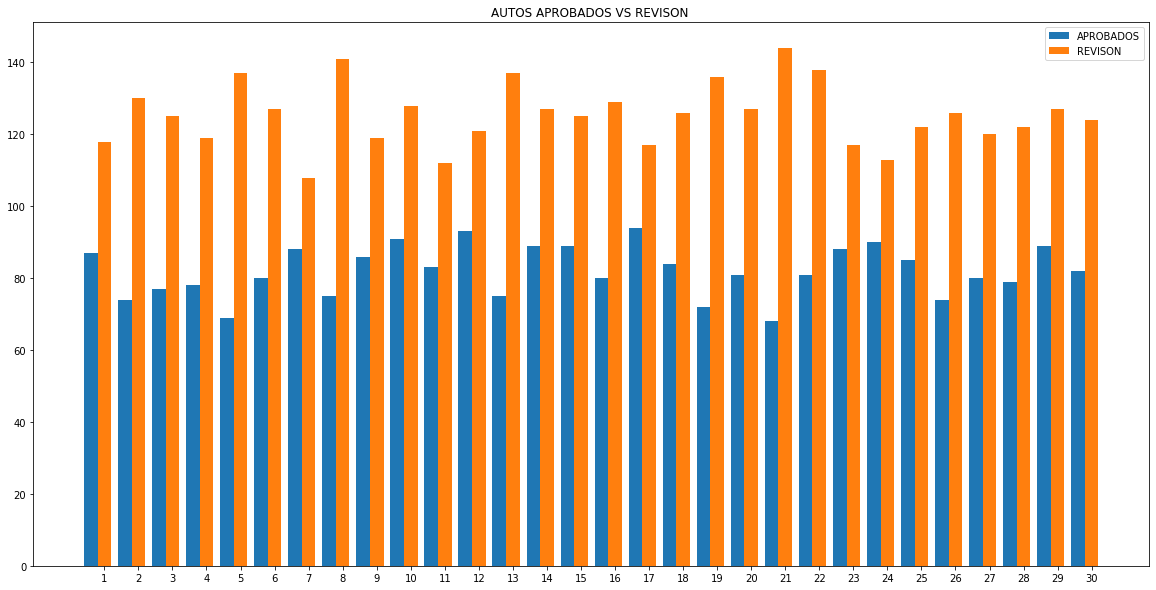

In [52]:

#///////////////////////////////////Grafica 2
plt.figure(figsize=(20,10), )
nombres = ["Negados","Aprobados"]

ancho_barras =0.40
indice_barras = np.arange((len(list(autos_aprovados.keys()))))

titulo="AUTOS APROBADOS VS REVISON "
plt.title(titulo)

plt.bar(indice_barras, list(autos_aprovados.values()), width=ancho_barras, align='center', label='APROBADOS')
plt.bar(indice_barras+ ancho_barras, list(autos_rechazados.values()), width=ancho_barras, align='center', label= 'REVISON')
plt.xticks(indice_barras + ancho_barras, (list(autos_aprovados.keys())))
plt.legend(loc='best')
plt.show()

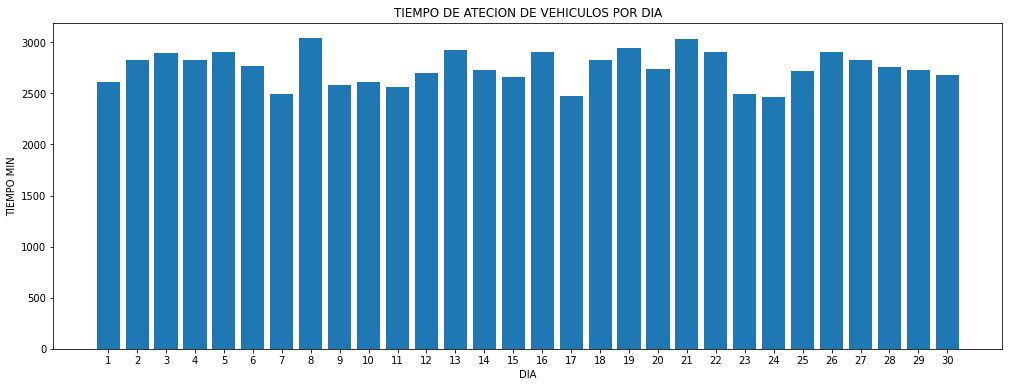

In [60]:
#///////////////////////////////////////grafica 3 

etiqueta = list(tiempoTotalAutos_porDis.keys())
valores = list(tiempoTotalAutos_porDis.values())
plt.figure(figsize=(17,6), )
plt.bar(range(len(tiempoTotalAutos_porDis)), valores, align="center", tick_label=etiqueta)
plt.title("TIEMPO DE ATECION DE VEHICULOS POR DIA")
plt.xlabel("DIA")
plt.ylabel("TIEMPO MIN")
plt.show()
